In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import glob
import datetime as dt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import metrics
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Importer datasett

In [2]:
spiller1 = pd.read_csv('../Spiller3.csv', sep=',')#, names=['value'], header=0)
spiller2 = pd.read_csv('../Spiller2.csv', sep=',')
injuries = pd.read_csv('./Injuries.csv', sep=',')
spiller1.head(5)

,Unnamed: 0,Date,Mood,Fatigue,Readiness,SleepDurH,SleepQuality,Soreness,Stress
0,79,20.03.2020,3.0,3.0,6.0,8.5,3.0,2.0,2.0
1,80,21.03.2020,4.0,3.0,6.0,10.0,3.0,2.0,3.0
2,81,22.03.2020,4.0,2.0,3.0,9.0,4.0,2.0,3.0
3,82,23.03.2020,3.0,3.0,7.0,8.5,3.0,3.0,3.0
4,83,24.03.2020,3.0,3.0,5.0,10.0,3.0,3.0,3.0


In [3]:
injuries

,Unnamed: 0,Date,Player,Injuries,Comment
0,0,2020-03-20,Spiller2,"{""right_thigh"":""minor""}",""""""
1,46,2020-03-22,Spiller3,"{""left_thigh"":""minor""}",""""""
2,47,2020-03-22,Spiller3,"{""left_thigh"":""minor""}",""""""
3,48,2020-03-23,Spiller3,"{""left_thigh"":""minor""}",""""""
4,0,2021-03-25,Spiller3,"{""right_knee"":""major""}",""""""
5,1,2021-09-16,Spiller3,"{""right_thigh"":""minor""}",""""""


## Fjern nullverdier
#### Benytter oss av ffill() som bruker forrige verdier for å fylle inn manglende verdier.

In [4]:
spiller1['Date'] = pd.to_datetime(spiller1['Date'], dayfirst=True)

spiller1['Readiness'] = spiller1['Readiness'].fillna(method = 'ffill')
spiller1['Mood'] = spiller1['Mood'].fillna(method = 'ffill')
spiller1['SleepQuality'] = spiller1['SleepQuality'].fillna(method = 'ffill')
spiller1['Stress'] = spiller1['Stress'].fillna(method = 'ffill')
spiller1['Fatigue'] = spiller1['Fatigue'].fillna(method = 'ffill')
spiller1['Soreness'] = spiller1['Soreness'].fillna(method = 'ffill')
spiller1['SleepDurH'] = spiller1['SleepDurH'].fillna(method = 'ffill')
spiller1.drop('Unnamed: 0',  inplace=True, axis=1)
spiller1.head(5)

,Date,Mood,Fatigue,Readiness,SleepDurH,SleepQuality,Soreness,Stress
0,2020-03-20,3.0,3.0,6.0,8.5,3.0,2.0,2.0
1,2020-03-21,4.0,3.0,6.0,10.0,3.0,2.0,3.0
2,2020-03-22,4.0,2.0,3.0,9.0,4.0,2.0,3.0
3,2020-03-23,3.0,3.0,7.0,8.5,3.0,3.0,3.0
4,2020-03-24,3.0,3.0,5.0,10.0,3.0,3.0,3.0


### Time series visualisering av Readiness til Spiller3
#### Det er viktig å se endring til Readiness etter skade 

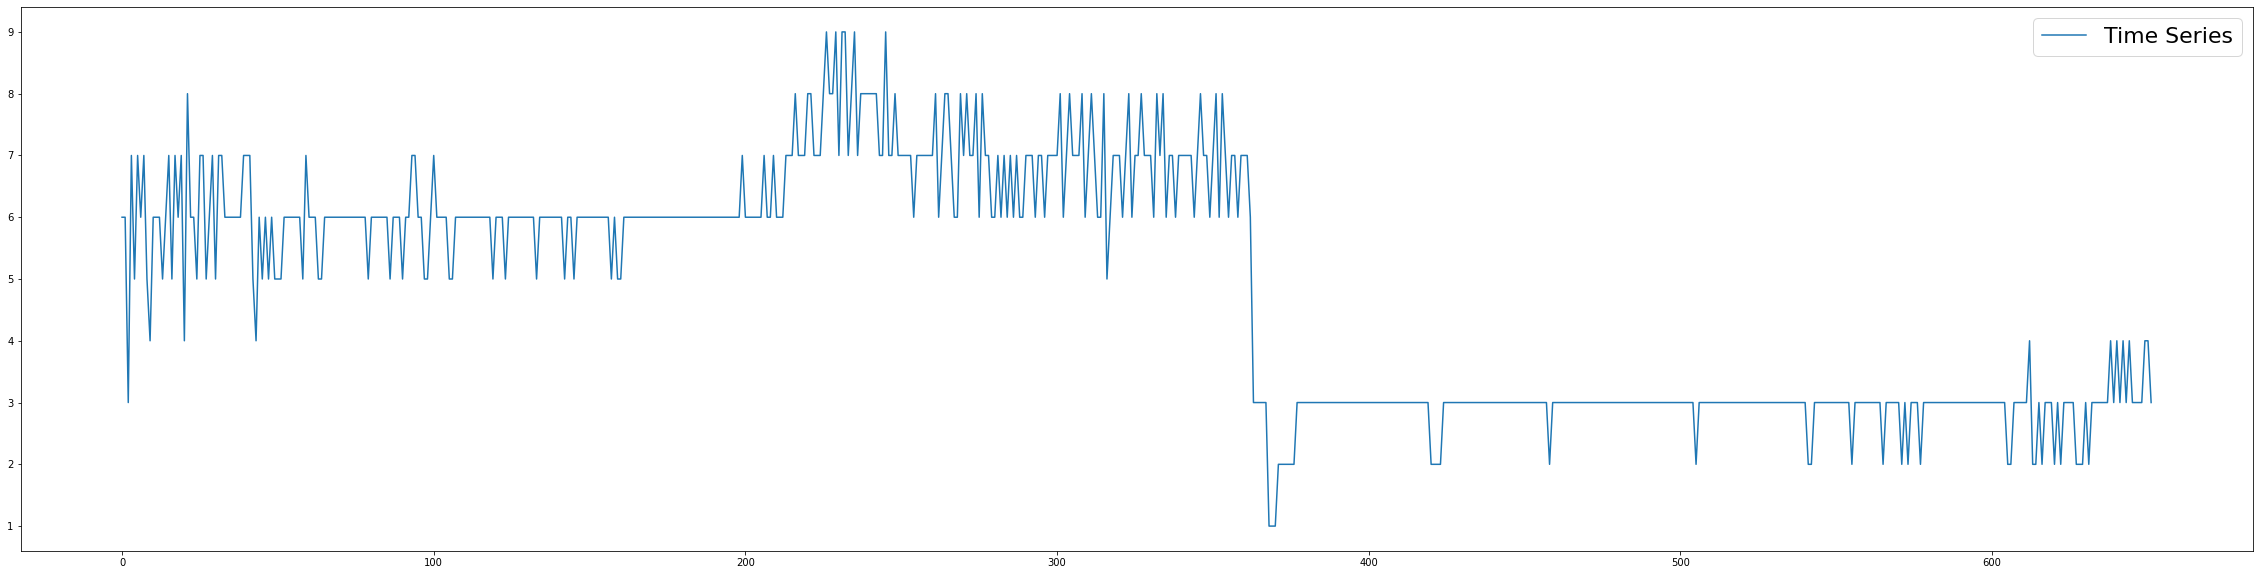

In [5]:
fig, ax = plt.subplots(figsize=(40,10))
spiller1['Readiness'].plot(ax=ax, label='Time Series')
plt.rcParams.update({'font.size':22})
ax.legend()
plt.show()

In [6]:
spiller2['Date'] = pd.to_datetime(spiller1['Date'], dayfirst=True)

spiller2['Readiness'] = spiller2['Readiness'].fillna(method = 'ffill')
spiller2['Mood'] = spiller2['Mood'].fillna(method = 'ffill')
spiller2['Sleep Quality'] = spiller2['Sleep Quality'].fillna(method = 'ffill')
spiller2['Stress'] = spiller2['Stress'].fillna(method = 'ffill')
spiller2['Fatigue'] = spiller2['Fatigue'].fillna(method = 'ffill')
spiller2['Soreness'] = spiller2['Soreness'].fillna(method = 'ffill')
spiller2['Sleep Durhation'] = spiller2['Sleep Durhation'].fillna(method = 'ffill')

spiller2.head(5)

,Date,Fatigue,Mood,Readiness,Sleep Durhation,Sleep Quality,Soreness,Stress
0,2020-03-20,3.0,2.0,6.0,9.0,3.0,2.0,3.0
1,2020-03-21,3.0,3.0,6.0,10.0,4.0,2.0,3.0
2,2020-03-22,2.0,3.0,1.0,10.0,3.0,2.0,3.0
3,2020-03-23,3.0,3.0,6.0,9.0,4.0,2.0,3.0
4,2020-03-24,2.0,2.0,6.0,9.0,4.0,2.0,3.0


### Time series visualisering av Readiness til Spiller2
#### Readiness verdier har ikke endret etter skade

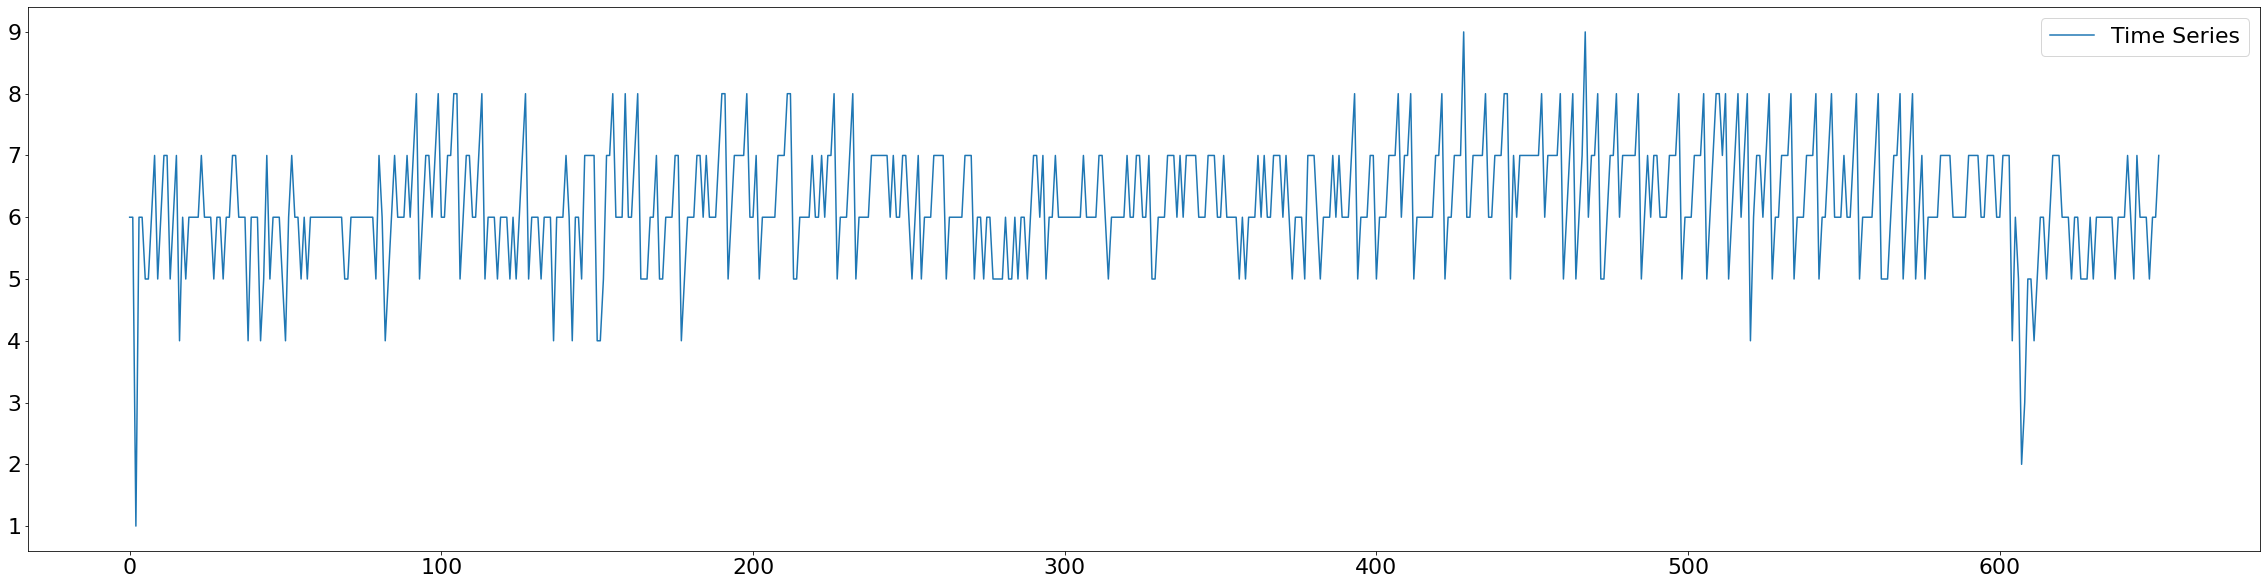

In [7]:
fig, ax = plt.subplots(figsize=(40,10))
spiller2['Readiness'].plot(ax=ax, label='Time Series')
plt.rcParams.update({'font.size':22})
ax.legend()
plt.show()

### Lager en funskjon som tar inn spillerens navn og returnerer skadedatoene som et array

In [8]:
def getPlayerWithInjury(playerName):
    ok = injuries[injuries['Player'].str.contains(playerName)]
    okDate = ok['Date']
    arrayDate = []
    arrayDate.append(okDate)
    array = np.array(okDate)
    return array

In [9]:
player1Injury = getPlayerWithInjury('Spiller3')
player2Injury = getPlayerWithInjury('Spiller2')
player1Injury

array(['2020-03-22', '2020-03-22', '2020-03-23', '2021-03-25',
       '2021-09-16'], dtype=object)

## Injury Feature
### Plasserer 1 for skade og 0 for ikke skade der datoen tilsvarer skadedatoen og lager en ny feature som heter Injury

In [10]:
def placeInjuryValue(df, dates):
        df['Injury'] = 0 
        for date in dates:
            df.loc[df['Date'] == date, 'Injury'] = 1   

In [11]:
placeInjuryValue(spiller1, player1Injury)
spiller1.head(5)

,Date,Mood,Fatigue,Readiness,SleepDurH,SleepQuality,Soreness,Stress,Injury
0,2020-03-20,3.0,3.0,6.0,8.5,3.0,2.0,2.0,0
1,2020-03-21,4.0,3.0,6.0,10.0,3.0,2.0,3.0,0
2,2020-03-22,4.0,2.0,3.0,9.0,4.0,2.0,3.0,1
3,2020-03-23,3.0,3.0,7.0,8.5,3.0,3.0,3.0,1
4,2020-03-24,3.0,3.0,5.0,10.0,3.0,3.0,3.0,0


In [12]:
placeInjuryValue(spiller2, player2Injury)
spiller2.head(5)

,Date,Fatigue,Mood,Readiness,Sleep Durhation,Sleep Quality,Soreness,Stress,Injury
0,2020-03-20,3.0,2.0,6.0,9.0,3.0,2.0,3.0,1
1,2020-03-21,3.0,3.0,6.0,10.0,4.0,2.0,3.0,0
2,2020-03-22,2.0,3.0,1.0,10.0,3.0,2.0,3.0,0
3,2020-03-23,3.0,3.0,6.0,9.0,4.0,2.0,3.0,0
4,2020-03-24,2.0,2.0,6.0,9.0,4.0,2.0,3.0,0


### Fjerning av dato ettersom vi er ikke trenger det

In [13]:
player1Injury = spiller1 
player2Injury = spiller2 
player1Injury.drop('Date',  inplace=True, axis=1)
player2Injury.drop('Date',  inplace=True, axis=1)
player1Injury.head(5)

,Mood,Fatigue,Readiness,SleepDurH,SleepQuality,Soreness,Stress,Injury
0,3.0,3.0,6.0,8.5,3.0,2.0,2.0,0
1,4.0,3.0,6.0,10.0,3.0,2.0,3.0,0
2,4.0,2.0,3.0,9.0,4.0,2.0,3.0,1
3,3.0,3.0,7.0,8.5,3.0,3.0,3.0,1
4,3.0,3.0,5.0,10.0,3.0,3.0,3.0,0


In [14]:
spiller1.loc[spiller1['Injury'] == 1].index

Int64Index([2, 3, 370, 545], dtype='int64')

### Ta 10 verdier som skal brukes til å trene modellen på


In [15]:
def getTenValues(df):
    index = df.loc[df['Injury'] == 1].index
    for i in index:
        print(i)
        if i == 0:
             resultdf= df.loc[i: i +9,:].reset_index(drop=True) #if  injury is first row
        #takes the 3. injury as the index and get datas 4 before and after
        elif i == df.index[-1]:
             resultdf= df.loc[i-9: i,:].reset_index(drop=True) #if  injury is in last row
        else:
            resultdf= df.loc[i-5: i +4,:].reset_index(drop=True)
        
        return resultdf.to_numpy()

In [16]:
# Injury on 21.03.2021
#major knee injury index 370
player1Injury = player1Injury.loc[360:375]

player1X = getTenValues(player1Injury) #HandleColumnsToArray()
player1X

370


array([[ 4. ,  2. ,  3. ,  7. ,  3. ,  3. ,  3. ,  0. ],
       [ 4. ,  3. ,  3. , 10. ,  4. ,  3. ,  3. ,  0. ],
       [ 3. ,  3. ,  3. ,  6. ,  3. ,  3. ,  3. ,  0. ],
       [ 4. ,  3. ,  1. ,  6. ,  3. ,  3. ,  2. ,  0. ],
       [ 4. ,  3. ,  1. ,  9. ,  4. ,  3. ,  3. ,  0. ],
       [ 3. ,  3. ,  1. , 10. ,  4. ,  3. ,  3. ,  1. ],
       [ 3. ,  3. ,  2. ,  9. ,  3. ,  3. ,  3. ,  0. ],
       [ 3. ,  3. ,  2. ,  9. ,  3. ,  3. ,  3. ,  0. ],
       [ 3. ,  3. ,  2. ,  7.5,  3. ,  3. ,  2. ,  0. ],
       [ 3. ,  2. ,  2. ,  5.5,  3. ,  3. ,  2. ,  0. ]])

In [17]:
# Injury on 20.03.2020
player2Injury = player2Injury.loc[0:10]

player2X = getTenValues(player2Injury) #HandleColumnsToArray()
player2X

0


array([[ 3. ,  2. ,  6. ,  9. ,  3. ,  2. ,  3. ,  1. ],
       [ 3. ,  3. ,  6. , 10. ,  4. ,  2. ,  3. ,  0. ],
       [ 2. ,  3. ,  1. , 10. ,  3. ,  2. ,  3. ,  0. ],
       [ 3. ,  3. ,  6. ,  9. ,  4. ,  2. ,  3. ,  0. ],
       [ 2. ,  2. ,  6. ,  9. ,  4. ,  2. ,  3. ,  0. ],
       [ 2. ,  3. ,  5. ,  9. ,  2. ,  2. ,  3. ,  0. ],
       [ 3. ,  4. ,  5. ,  9. ,  4. ,  2. ,  4. ,  0. ],
       [ 4. ,  3. ,  6. ,  8.5,  3. ,  2. ,  4. ,  0. ],
       [ 3. ,  3. ,  7. ,  8.5,  4. ,  2. ,  3. ,  0. ],
       [ 2. ,  3. ,  5. , 10. ,  4. ,  2. ,  4. ,  0. ]])

### Ta injury kolonnen ut av arrayet og gjøre om til et eget array

In [18]:
def getInjuryArray(XArray): 
        return XArray[:,-1]
def deleteLastRowX(array):
    return array[0:,:7]

In [19]:
Player1InjuryNumbers = getInjuryArray(player1X)
player1y = np.array(Player1InjuryNumbers)
player1y

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [20]:
Player2InjuryNumbers = getInjuryArray(player2X)
player2y = np.array(Player2InjuryNumbers)
player2y

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [21]:
player1X=deleteLastRowX(player1X)
player2X=deleteLastRowX(player2X)

In [22]:
player1y

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [23]:
player2y

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Tren logistic regression modell med input verdiene 

In [24]:
logreg1 = LogisticRegression(C=100).fit(player1X,player1y) #injury on 25.03.2021
print("Training set score: {:.3f}".format(logreg1.score(player1X,player1y)))
logreg1

Training set score: 1.000


LogisticRegression(C=100)

In [25]:
logreg2 = LogisticRegression(C=100).fit(player2X,player2y) #injury on 21.03.2020
print("Training set score: {:.3f}".format(logreg1.score(player2X,player2y)))
logreg2

Training set score: 0.800


LogisticRegression(C=100)

### Lag en eksempel array med ny input verdier som en spiller "loggfører"

In [26]:
X_new =  np.array([2., 3., 1., 9., 3., 2., 3.]) #for example low readiness of 1
X_new = X_new.reshape(1,-1)
prediction1 = logreg1.predict(X_new)
print(prediction1)

[1.]


In [27]:
X_new2 = np.array([1., 3., 9., 5., 2., 3., 2.])   #for example high readiness of 9
X_new2 = X_new2.reshape(1,-1)
prediction2 = logreg2.predict(X_new2)
print(prediction2)

[0.]


### Prediker med en ny input data

In [28]:
prob = logreg1.predict_proba(X_new)
prob

array([[0.33553656, 0.66446344]])

In [29]:
prob2 = logreg2.predict_proba(X_new2)
prob2

array([[0.94886319, 0.05113681]])

### Skriv ut prediksjons resultater

In [30]:
print(prob)
injury = round(float(prob[0][1])*100)
print("PLayer3 risk of injury is:"+str(injury)+"%")
print('-----------')
print(prob2)
injury2 = round(float(prob2[0][1])*100)
print("PLayer2 risk of injury is:"+str(injury2)+"%")

[[0.33553656 0.66446344]]
PLayer3 risk of injury is:66%
-----------
[[0.94886319 0.05113681]]
PLayer2 risk of injury is:5%
